In [1]:
import numpy as np
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
#from xarray import open_mfadataset
import cartopy.crs as crs
import cartopy
from matplotlib.colors import LogNorm
import numpy as np
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cmocean
import matplotlib
from pathlib import Path
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show
from pyschism.mesh import Hgrid
import pyschism
from matplotlib.image import imread
import cmcrameri.cm as ccm
from matplotlib.collections import PolyCollection

print("Modules imported!")


ERROR 1: PROJ: proj_create_from_database: Open of /global/home/users/jennaisrael/.conda/envs/schimpy/share/proj failed
/global/home/users/jennaisrael/.conda/envs/schimpy/lib/python3.9/site-packages/pyschism/forcing/hycom/gofs.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


Modules imported!


In [2]:
#import Sienna's plotting library
import schism_plot_lib as spl
import time

In [3]:
output_folder='/global/scratch/users/jennaisrael/run_schism/run_16/outputs/'
output1=spl.SchismOutput(output_folder)


 Creating run object for results in /global/scratch/users/jennaisrael/run_schism/run_16/outputs/ ... 

Found 1434 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - zCoordinates


In [4]:
fn = "/global/scratch/users/jennaisrael/run_schism/run_16/outputs/"
run = spl.SchismOutput(output_folder=fn)


 Creating run object for results in /global/scratch/users/jennaisrael/run_schism/run_16/outputs/ ... 

Found 1434 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - zCoordinates


In [5]:
ds = run.Result(run, variable = "salinity", filenumber=50)

Loading in /global/scratch/users/jennaisrael/run_schism/run_16/outputs/salinity_50.nc
Loaded in dataset! 

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 4.235e+06 4.237e+06 ... 4.318e+06 4.32e+06
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...


In [6]:
print(ds)

In [7]:
sal50=xr.open_dataset('/global/scratch/users/jennaisrael/run_schism/run_16/outputs/salinity_50.nc')

In [8]:
run.get_types_of_output()

Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - zCoordinates


In [9]:
sal50.time

<xarray.DataArray 'time' (time: 48)> Size: 384B
array([4235400., 4237200., 4239000., 4240800., 4242600., 4244400., 4246200.,
       4248000., 4249800., 4251600., 4253400., 4255200., 4257000., 4258800.,
       4260600., 4262400., 4264200., 4266000., 4267800., 4269600., 4271400.,
       4273200., 4275000., 4276800., 4278600., 4280400., 4282200., 4284000.,
       4285800., 4287600., 4289400., 4291200., 4293000., 4294800., 4296600.,
       4298400., 4300200., 4302000., 4303800., 4305600., 4307400., 4309200.,
       4311000., 4312800., 4314600., 4316400., 4318200., 4320000.])
Coordinates:
  * time     (time) float64 384B 4.235e+06 4.237e+06 ... 4.318e+06 4.32e+06
Attributes:
    i23d:       0
    base_date:   2019  7  1       0.00       8.00

Taking temporal average ... 
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Taking depth average ... 
Loaded in hgrid.gr3 file...

Domain = South_Delta
/global/scratch/users/jennaisrael/Plotting
Saved SCHISM time-averaged salinity at time-averaged from Jan 01 1970 00_00 to Jan 01 1970 00_00.png.




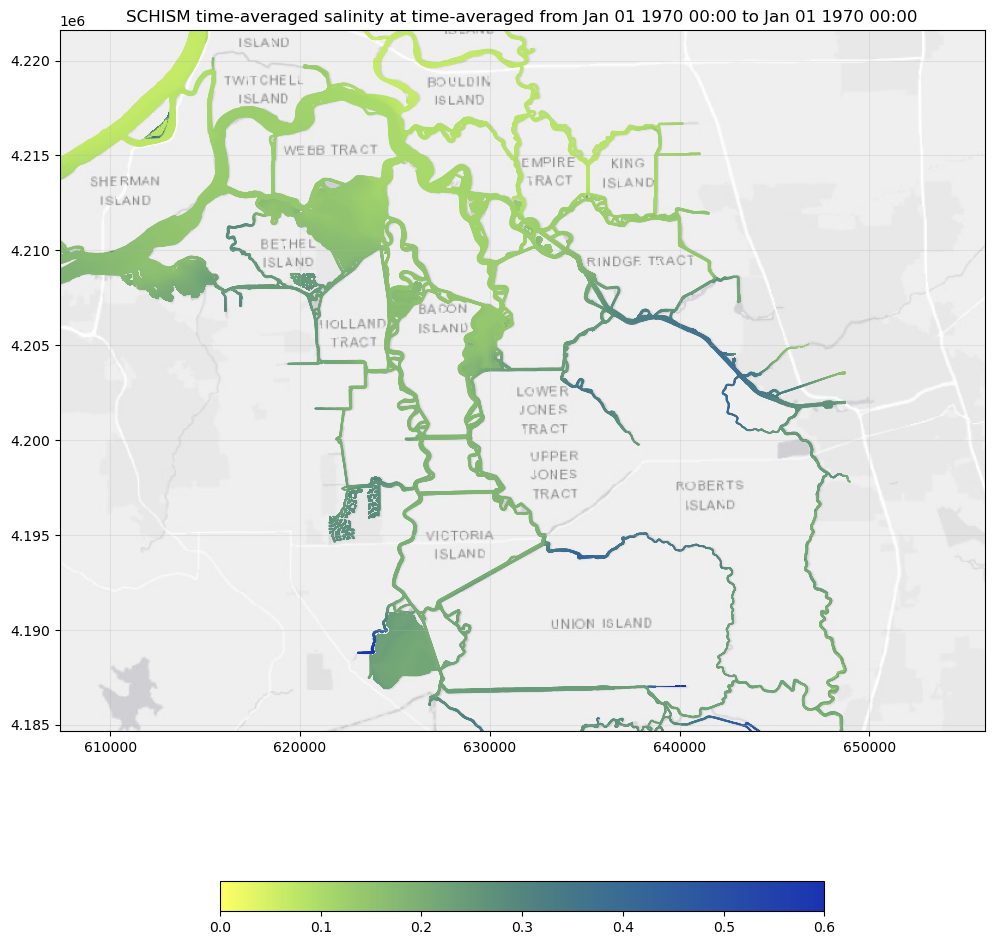

In [10]:
fig, ax = ds.plot_variable(run, domain="South_Delta", time="average", depth="average")

In [11]:
# files=output1.get_netcdf_files()
# print(files)

In [12]:
ds.dataset-ds.dataset

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 4.235e+06 4.237e+06 ... 4.318e+06 4.32e+06
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB na...

In [13]:
fn_decreased = "/global/scratch/users/jennaisrael/run_schism/run_17/outputs/"
run_decreased = spl.SchismOutput(output_folder=fn_decreased)
ds_decreased = run.Result(run_decreased, variable = "salinity", filenumber=50)


 Creating run object for results in /global/scratch/users/jennaisrael/run_schism/run_17/outputs/ ... 

Found 1434 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - zCoordinates
Loading in /global/scratch/users/jennaisrael/run_schism/run_17/outputs/salinity_50.nc
Loaded in dataset! 

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 4.235e+06 4.237e+06 ... 4.318e+06 4.32e+06
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...


In [14]:
nc_diff=ds.dataset-ds_decreased.dataset

In [15]:
nc_diff

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 4.235e+06 4.237e+06 ... 4.318e+06 4.32e+06
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB na...

In [16]:
nc_diff.salinity.max()

<xarray.DataArray 'salinity' ()> Size: 4B
array(0.51808405, dtype=float32)

In [21]:
nc_diff.salinity.idxmax(dim='time')

<xarray.DataArray 'time' (nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)> Size: 56MB
array([[     nan,      nan,      nan, ..., 4235400., 4235400., 4235400.],
       [     nan,      nan,      nan, ..., 4235400., 4235400., 4235400.],
       [     nan,      nan,      nan, ..., 4235400., 4235400., 4235400.],
       ...,
       [     nan,      nan,      nan, ..., 4302000., 4300200., 4300200.],
       [     nan,      nan,      nan, ..., 4300200., 4300200., 4300200.],
       [     nan,      nan,      nan, ..., 4302000., 4300200., 4300200.]])
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers

In [25]:
nc_diff.salinity.mean(dim='nSCHISM_vgrid_layers').mean(dim='time')

<xarray.DataArray 'salinity' (nSCHISM_hgrid_node: 305834)> Size: 1MB
array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.3218435e-10,
       1.6409016e-09, 1.1974149e-09], dtype=float32)
Dimensions without coordinates: nSCHISM_hgrid_node

In [29]:
#nc_diff.salinity.mean(dim='nSCHISM_vgrid_layers').mean(dim='time').idxmax()
nc_diff.salinity.mean(dim='nSCHISM_vgrid_layers').mean(dim='time').argmax()

<xarray.DataArray 'salinity' ()> Size: 8B
array(86670)

In [31]:
#what are the coordinates of this node
proj_utm10 = 'EPSG:26910'
hgrid = Hgrid.open("/global/scratch/users/jennaisrael/run_schism/run_16/hgrid.gr3", crs=proj_utm10)

In [32]:
hgrid.__dir__()

['nodes',
 'elements',
 'description',
 'hull',
 '_boundaries',
 '__module__',
 '__doc__',
 '__init__',
 'open',
 'to_dict',
 'copy',
 'make_plot',
 'boundaries',
 'ocean_boundaries',
 'land_boundaries',
 'interior_boundaries',
 '__abstractmethods__',
 '_abc_impl',
 '__str__',
 'write',
 'get_xy',
 'get_xyz',
 'get_bbox',
 'invert_sign',
 'transform_to',
 'vertices_around_vertex',
 'tricontourf',
 'tripcolor',
 'triplot',
 'quadplot',
 'quadface',
 'wireframe',
 'coords',
 'coord',
 'vertices',
 'vertex_id',
 'element_id',
 'values',
 'crs',
 'x',
 'y',
 'triangles',
 'quads',
 'triangulation',
 'bbox',
 'md5',
 '__dict__',
 '__weakref__',
 '__slots__',
 '__repr__',
 '__hash__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [39]:
#np.where(hgrid.nodes==86670)
np.where(hgrid.element_id==86670)

/tmp/ipykernel_250837/1729565257.py:2: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  np.where(hgrid.element_id==86670)


(array([], dtype=int64),)

In [17]:
ds.dataset=nc_diff

In [18]:
ds.dataset.salinity.max()

<xarray.DataArray 'salinity' ()> Size: 4B
array(0.51808405, dtype=float32)

In [19]:
ds.dataset.salinity.idxmax(dim=)

ValueError: Must supply 'dim' argument for multidimensional arrays

Taking temporal average ... 
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Taking depth average ... 
Domain = Delta
/global/scratch/users/jennaisrael/Plotting
Saved SCHISM time-averaged salinity at time-averaged from Jan 01 1970 00_00 to Jan 01 1970 00_00.png.




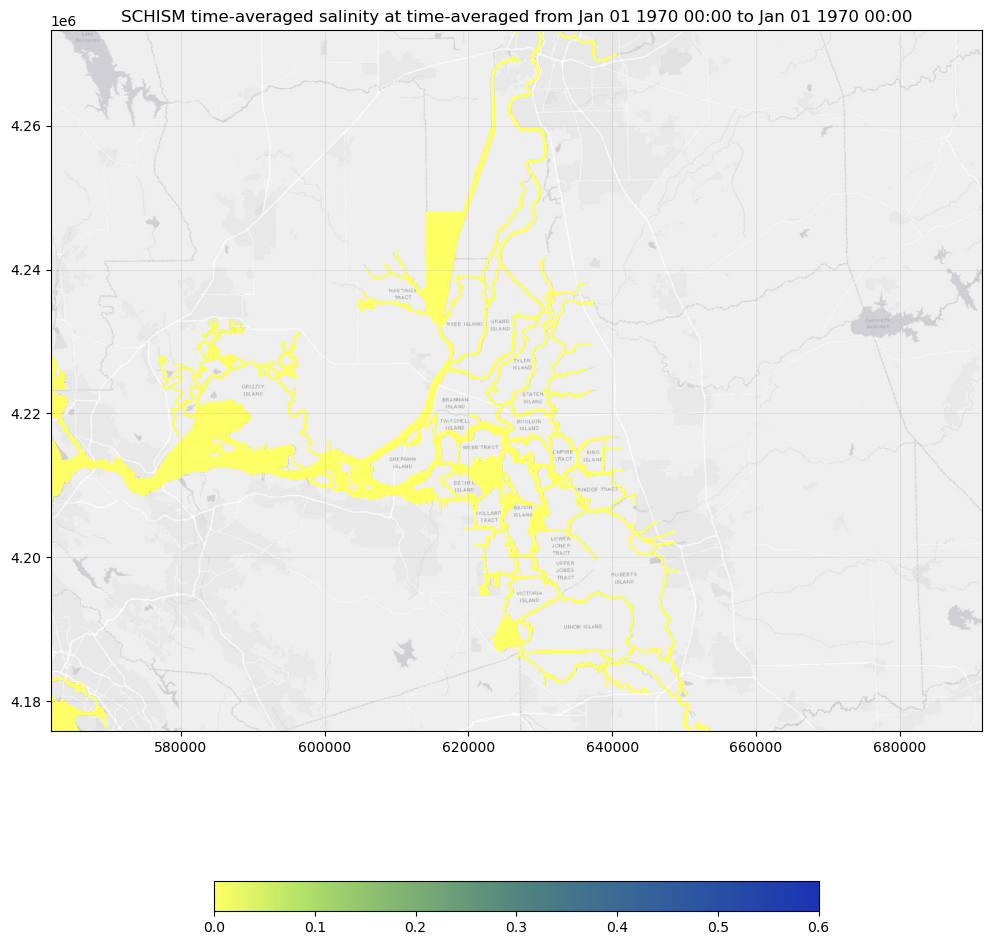

In [20]:
fig, ax = ds.plot_variable(run, domain="Delta", time="average", depth="average")

In [25]:
ax.set_xlim([620000,640000])
ax.set_ylim([4.20e6,4.22e6])
fig.show()

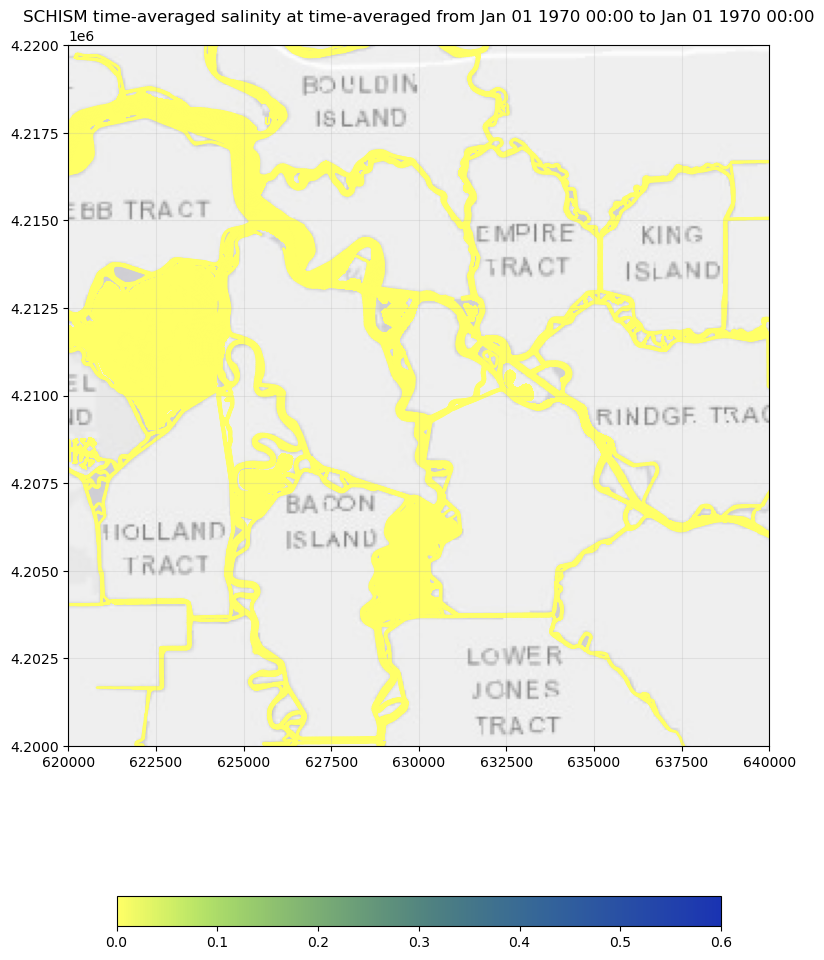

In [26]:
fig

In [6]:
# print(type(output1.files))

In [7]:
# output1.get_types_of_output()

In [8]:
# var='salinity'
# varfilenames=[f for f in output1.files if var in f]
# print(varfilenames)

In [9]:
# sal1=xr.open_dataset('/global/scratch/users/jennaisrael/run_schism/run_16/outputs/salinity_1.nc')
# sal2=xr.open_dataset('/global/scratch/users/jennaisrael/run_schism/run_16/outputs/salinity_2.nc')
# print(sal1)
# print(sal2)

In [10]:
# xr.merge([sal1,sal2])

In [11]:
# sal1.mean(dim='time').mean(dim='nSCHISM_vgrid_layers')

In [12]:
import glob

In [13]:
# #ds = xarray.open_mfdataset('path/to/file/*.nc')
# #salinity=xr.open_mfadataset(output_folder+'salinity_*.',)
# #ds = xarray.merge([xarray.open_dataset(f) for f in glob.glob('path/to/file/.*nc')])

# #salinity=xr.merge(['/global/scratch/users/jennaisrael/run_schism/run_8/outputs/salinity_1.nc','/global/scratch/users/jennaisrael/run_schism/run_8/outputs/salinity_2.nc'])
# #this uses too much memory, try with just 2 files
# #salinity=xr.merge([xr.open_dataset(f) for f in glob.glob('/global/scratch/users/jennaisrael/run_schism/run_8/outputs/salinity*')])

# #still too much memory on slurm, try taking the depth average first
# #initialize dataframe
# salinity=xr.Dataset()
# for f in glob.glob('/global/scratch/users/jennaisrael/run_schism/run_16/outputs/salinity*'):
#     salinity=xr.merge([salinity, xr.open_dataset(f).mean(dim='nSCHISM_vgrid_layers')])
    
# salinity.head()

In [14]:
#print(salinity)

In [15]:
# Define paths
basemap = '/global/scratch/users/jennaisrael/fc_esdl/fc_esdl/data/plotting/basemap_delta.tif'
grid = "/global/scratch/users/jennaisrael/run_schism/run_8/hgrid_clean.gr3" #use this file for now
# Define projections 
proj_utm10 = 'EPSG:26910'
global_proj = crs.PlateCarree()
# Open up our grid file as an HGrid Class object (pyschism)
hgrid = Hgrid.open(grid, crs=proj_utm10)

In [16]:
def make_figure(variable, variable_name, vmin, vmax):

  proj = crs.UTM(10)
  fig = plt.figure(figsize=(13,13))
  ax = plt.gca()

  cmap = ccm.imola_r # cmocean.haline #

  with rasterio.open(basemap) as src:
    i = show(src, transform = src.transform, cmap='binary', ax = ax)

  args = {'vmin': vmin, 'vmax': vmax}
  climits= [args['vmin'], args['vmax']]
  args['cmap'] = cmap

  values = variable # salinity
  ax.tripcolor(hgrid.x, hgrid.y, hgrid.triangles, values, shading='flat', **args) #linewidth=0.2,
  pc = PolyCollection(hgrid.coords[hgrid.quads], clim=climits, cmap=cmap)

  # THIS IS A CRITICAL STEP ... IT TURNS OUT 
  quad_value = np.mean(values[hgrid.quads], axis=1)

  pc.set_array(quad_value)
  pc.set_edgecolor('face')
  ax.add_collection(pc)

  # # Whole Delta
  # ax.set_xlim(561916,691396)
  # ax.set_ylim(4175849, 4273290)

  # South Delta
  # ax.set_xlim(607332,656086)
  # ax.set_ylim(4184679, 4221602)

  # Stockton Shipping Channel
  ax.set_xlim(640781.2, 651441.3)
  ax.set_ylim(4200092.1, 4206992.1)

  cbar = plt.colorbar(pc, orientation="horizontal", shrink=0.6)
  # ax.axis("scaled")
  # title = "SCHISM time-averaged %s @ %s" (variable_name, timestamp)
  # t = ax.set_title(title)
  # plt.tight_layout()
  fig.savefig("%s_ZOOMED.png" % title, dpi=300)
  return

In [17]:
sal1=xr.open_dataset('/global/scratch/users/jennaisrael/run_schism/run_16/outputs/salinity_1.nc')

In [18]:
print(sal1)

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 1.8e+03 3.6e+03 5.4e+03 ... 8.46e+04 8.64e+04
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...


In [19]:
sal1.head()

<xarray.Dataset> Size: 540B
Dimensions:   (time: 5, nSCHISM_hgrid_node: 5, nSCHISM_vgrid_layers: 5)
Coordinates:
  * time      (time) float64 40B 1.8e+03 3.6e+03 5.4e+03 7.2e+03 9e+03
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 500B ...

In [21]:
print(sal1.isel(nSCHISM_vgrid_layers=0, time=slice(None, 1)))

<xarray.Dataset> Size: 1MB
Dimensions:   (time: 1, nSCHISM_hgrid_node: 305834)
Coordinates:
  * time      (time) float64 8B 1.8e+03
Dimensions without coordinates: nSCHISM_hgrid_node
Data variables:
    salinity  (time, nSCHISM_hgrid_node) float32 1MB ...


In [23]:
myslice=sal1.isel(nSCHISM_vgrid_layers=0, time=slice(None, 1)).drop_vars('time')
print(myslice)

<xarray.Dataset> Size: 1MB
Dimensions:   (time: 1, nSCHISM_hgrid_node: 305834)
Dimensions without coordinates: time, nSCHISM_hgrid_node
Data variables:
    salinity  (time, nSCHISM_hgrid_node) float32 1MB ...


In [25]:
print(myslice.salinity.to_dataframe())

                         salinity
time nSCHISM_hgrid_node          
0    0                        NaN
     1                        NaN
     2                        NaN
     3                        NaN
     4                        NaN
...                           ...
     305829                   NaN
     305830                   NaN
     305831                   NaN
     305832                   NaN
     305833                   NaN

[305834 rows x 1 columns]


In [ ]:
print(sal1.salinity.max())
print(sal1.salinity.min())

In [ ]:
saldf=sal1.to_dataframe()
print(saldf)

In [38]:
print(sal1.isel(time=0,nSCHISM_vgrid_layers=0).salinity.min())

<xarray.DataArray 'salinity' ()> Size: 4B
array(29.71742, dtype=float32)
Coordinates:
    time     float64 8B 1.8e+03


In [ ]:
# #depth and time avg
# salinity=sal1.mean(dim='nSCHISM_vgrid_layers').mean('time')

In [39]:
#just take a slice in horizontal space
salinity=sal1.isel(time=0,nSCHISM_vgrid_layers=0)
print()

<bound method Dataset.to_dataframe of <xarray.Dataset> Size: 1MB
Dimensions:   (nSCHISM_hgrid_node: 305834)
Coordinates:
    time      float64 8B 1.8e+03
Dimensions without coordinates: nSCHISM_hgrid_node
Data variables:
    salinity  (nSCHISM_hgrid_node) float32 1MB ...>


In [41]:
print(salinity.to_dataframe['salinity'])

TypeError: 'method' object is not subscriptable

In [27]:
salslice=salinity.drop_vars('time')
print(salslice)

<xarray.Dataset> Size: 1MB
Dimensions:   (nSCHISM_hgrid_node: 305834)
Dimensions without coordinates: nSCHISM_hgrid_node
Data variables:
    salinity  (nSCHISM_hgrid_node) float32 1MB ...


In [35]:
sal_pd=salslice.to_pandas()
sal_pd.head()

nSCHISM_hgrid_node
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float32

In [ ]:
make_figure(sal_pd.salinity, "salinity", 0, 40)

In [ ]:
##plot_variable(self, schism_output, domain="SSC", time="average", depth="average")
#plot_variable(output1, salinity

In [ ]:
# #make a plot of time averaged salinity, based on Sienna's plot_variable function 
#  fig = plt.figure(figsize=(13,13))
#             ax = plt.gca() 

#             cmap = ccm.imola_r # cmocean.haline #

#             # Add basemap 
#             self.add_basemap(ax=ax)
    
#             climit = climits[self.variable]
#             args = {'vmin': climit[0], 'vmax': climit[1]}
#             args['cmap'] = cmap

#             ax.tripcolor(schism_output.hgrid.x, 
#                             schism_output.hgrid.y, 
#                             schism_output.hgrid.triangles, 
#                             values, 
#                             shading='flat', 
#                             **args) #linewidth=0.2,
#             pc = PolyCollection(schism_output.hgrid.coords[schism_output.hgrid.quads], clim=climit, cmap=cmap)
#             quad_value = np.mean(values[schism_output.hgrid.quads], axis=1)  # THIS IS A CRITICAL STEP ... IT TURNS OUT 
#             pc.set_array(quad_value)
#             pc.set_edgecolor('face')
#             ax.add_collection(pc)
#             ax.grid(alpha = 0.25) 
#             ax = self.set_domain(domain, ax)

#             cbar = plt.colorbar(pc, orientation="horizontal", shrink=0.6)
#             title = "SCHISM time-averaged %s at %s" % (var2title[self.variable], timestamp)
#             t = ax.set_title(title)
#             fn = "%s.png" % title.replace(":", "_")
#             print(os.getcwd())
#             fig.savefig(fn, dpi=300)
#             print("Saved %s.\n\n" % fn)